([<matplotlib.patches.Wedge at 0x7f97cd9f3040>,
 [Text(0.22909651864138758, 1.0758786107858065, 'less than 40x40'),
  Text(-0.5764701997835255, -0.9368468971830682, 'less than 80x80'),
  Text(0.9654382738144976, -0.5271896617481068, 'less than 100x100'),
  Text(1.0862974710336615, -0.17308322976496465, 'more than 100x100')],
 [Text(0.12496173744075685, 0.5868428786104398, '43.3%'),
  Text(-0.31443829079101393, -0.5110073984634917, '45.8%'),
  Text(0.5266026948079078, -0.2875579973171491, '5.9%'),
  Text(0.592525893291088, -0.09440903441725343, '5.0%')])

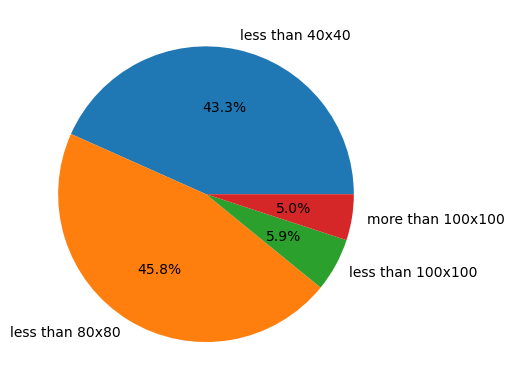

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


# Related to train
# -------------------------------------------------------
train_dataset = []
train_dimensions = []
with open("../archive/Train.csv", "r") as train_stats:
    for line in train_stats:
        if not line.startswith("Width"):
            columns = line.split(",")
            train_dataset.append(int(columns[-2]))
            train_dimensions.append(int(columns[0]) * int(columns[0]))

train_dimensions = np.array(train_dimensions)
by_pixels = []
by_pixels.append((train_dimensions <= 40*40).sum())
by_pixels.append(len([i for i in train_dimensions if 40*40 < i <= 80*80]))
by_pixels.append(len([i for i in train_dimensions if 80*80 < i <= 100*100]))
by_pixels.append((train_dimensions > 100*100).sum())
fig, ax = plt.subplots()
ax.pie(by_pixels, labels=["less than 40x40", "less than 80x80", "less than 100x100", "more than 100x100"], autopct='%1.1f%%')

Number of images to train: 39209


Text(0, 0.5, 'samples')

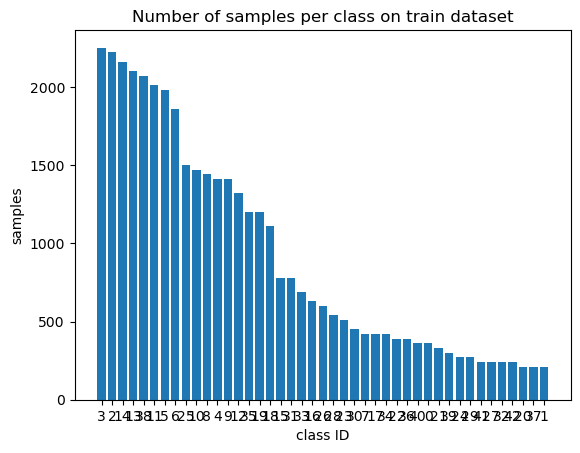

In [14]:
print("Number of images to train:", len(train_dataset))
counter = dict(Counter(train_dataset))
keys = list(counter.keys())
values = list(counter.values())
sorted_value_index = np.argsort(values)[::-1]
for i in sorted_value_index:
    #print("{:2}\t{}".format(keys[i], values[i]))
    continue
values.sort(reverse=True)
plt.bar(range(0,43), values)
plt.xticks(range(0,43), sorted_value_index)
plt.title("Number of samples per class on train dataset")
plt.xlabel("class ID")
plt.ylabel("samples")
#plt.show()

In [4]:
import os 
print(os.getcwd())

/home/emanuel/Desktop/TAA/trabalho1/code


Number of images to test: 12630
[750, 720, 720, 690, 690, 660, 660, 630, 480, 480, 450, 450, 450, 420, 390, 390, 360, 270, 270, 210, 210, 180, 150, 150, 150, 150, 150, 120, 120, 120, 90, 90, 90, 90, 90, 90, 90, 60, 60, 60, 60, 60, 60]


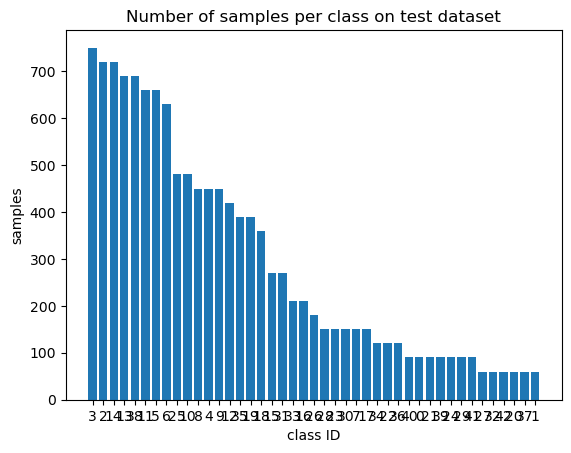

24.363895908485887


In [16]:
# Related to test
# -------------------------------------------------------
test_classes = []
with open("../archive/Test.csv", "r") as test_stats:
    for line in test_stats:
        if not line.startswith("Width"):
            columns = line.split(",")
            test_classes.append(int(columns[-2]))

print("Number of images to test:", len(test_classes))
counter = dict(Counter(test_classes))
keys = list(counter.keys())
values = list(counter.values())
#sorted_value_index = np.argsort(values)[::-1]
for i in sorted_value_index:
    #print("{:2}\t{}".format(keys[i], values[i]))
    continue
values.sort(reverse=True)
print(values)
plt.bar(range(0,43), values)
plt.xticks(range(0,43), sorted_value_index)
plt.title("Number of samples per class on test dataset")
plt.xlabel("class ID")
plt.ylabel("samples")
plt.show()

print(len(test_classes) / (len(train_dataset) + len(test_classes)) * 100)